### Two way ANOVA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# create a dataset
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                    'sun': np.tile(np.repeat(['low','medium', 'high'], 5), 2),
                    'height': [6,6,6,5,6,5,5,6,4,5,
                                6,6,7,8,7,3,4,4,4,5,
                                4,4,4,4,4,5,6,6,7,8]})
df.sample(10)

,water,sun,height
18,weekly,low,4
3,daily,low,5
10,daily,high,6
12,daily,high,7
25,weekly,high,5
24,weekly,medium,4
16,weekly,low,4
19,weekly,low,5
5,daily,medium,5
9,daily,medium,5


/home/ibadhep/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

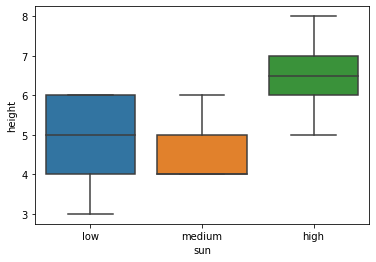

In [7]:
sns.boxplot(df['sun'], df['height'])

/home/ibadhep/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

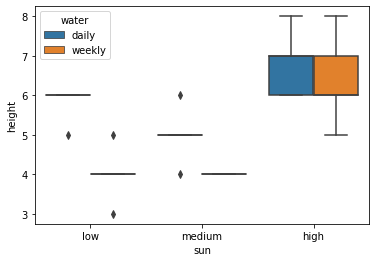

In [6]:
sns.boxplot(df['sun'], df['height'], hue=df['water'])

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#one way ANOVA
model = ols('height ~ sun', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
sun,24.866667,2.0,14.105042,0.000064
Residual,23.800000,27.0,NaN,NaN


In [9]:
#two way ANOVA
model = ols('height ~ C(sun) + C(water) + C(sun):C(water)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(sun),24.866667,2.0,23.3125,0.000002
C(water),8.533333,1.0,16.0000,0.000527
C(sun):C(water),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


In [10]:
# another way of doing two way ANOVA
import pingouin as pg
aov = pg.anova(data=df, dv='height', between=['sun', 'water'], detailed=True)
print(aov)

        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN


### How to impliment tukey test?
### how to do lettering and grouping?
### How to do annotation in graphs?

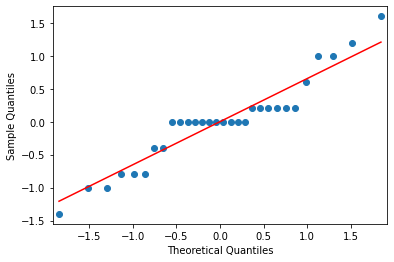

In [11]:
# qq norm plot 
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()